In [78]:
%matplotlib inline 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [79]:
Germany_df = pd.read_excel('Germany_cases_with_hospital_info_gender_age_cleaned.xlsx')

In [80]:
Germany_df.head()

,state,date,cases,deaths,recovered,allbed_mean,ICUbed_mean,InvVen_mean,deaths_mean,admis_mean,...,15_34_deaths,35_59_deaths,60_79_deaths,80_99_deaths,0_4_recovered,5_14_recovered,15_34_recovered,35_59_recovered,60_79_recovered,80_99_recovered
0,Baden-Wurttemberg,2020-02-11,1,0,1,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,Baden-Wurttemberg,2020-02-20,1,0,1,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,Baden-Wurttemberg,2020-02-24,1,0,1,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,Baden-Wurttemberg,2020-02-25,3,0,3,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,NaN,2.0,NaN,NaN,1.0
4,Baden-Wurttemberg,2020-02-26,4,0,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN


In [81]:
Germany_df.shape

(1467, 41)

In [82]:
Germany_df.columns

Index(['state', 'date', 'cases', 'deaths', 'recovered', 'allbed_mean',
       'ICUbed_mean', 'InvVen_mean', 'deaths_mean', 'admis_mean',
       'newICU_mean', 'totdea_mean', 'bedover_mean', 'icuover_mean',
       'total_tests', 'confirmed_infections', 'est_infections_mean',
       'Female_Cases', 'Male_Cases', 'Female_Deaths', 'Male_Deaths',
       'Female_Recovered', 'Male_Recovered', '0_4_cases', '5_14_cases',
       '15_34_cases', '35_59_cases', '60_79_cases', '80_99_cases',
       '0_4_deaths', '5_14_deaths', '15_34_deaths', '35_59_deaths',
       '60_79_deaths', '80_99_deaths', '0_4_recovered', '5_14_recovered',
       '15_34_recovered', '35_59_recovered', '60_79_recovered',
       '80_99_recovered'],
      dtype='object')

In [83]:
Germany_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   state                 1467 non-null   object        
 1   date                  1467 non-null   datetime64[ns]
 2   cases                 1467 non-null   int64         
 3   deaths                1467 non-null   int64         
 4   recovered             1467 non-null   int64         
 5   allbed_mean           1463 non-null   float64       
 6   ICUbed_mean           1463 non-null   float64       
 7   InvVen_mean           1463 non-null   float64       
 8   deaths_mean           1463 non-null   float64       
 9   admis_mean            1463 non-null   float64       
 10  newICU_mean           1463 non-null   float64       
 11  totdea_mean           1463 non-null   float64       
 12  bedover_mean          1463 non-null   float64       
 13  icuover_mean      

In [84]:
# Dropping columns that are not required for the Analysis

Germany_df.drop(['newICU_mean','bedover_mean','icuover_mean','est_infections_mean'], axis=1,inplace=True)

In [85]:
Germany_df.columns

Index(['state', 'date', 'cases', 'deaths', 'recovered', 'allbed_mean',
       'ICUbed_mean', 'InvVen_mean', 'deaths_mean', 'admis_mean',
       'totdea_mean', 'total_tests', 'confirmed_infections', 'Female_Cases',
       'Male_Cases', 'Female_Deaths', 'Male_Deaths', 'Female_Recovered',
       'Male_Recovered', '0_4_cases', '5_14_cases', '15_34_cases',
       '35_59_cases', '60_79_cases', '80_99_cases', '0_4_deaths',
       '5_14_deaths', '15_34_deaths', '35_59_deaths', '60_79_deaths',
       '80_99_deaths', '0_4_recovered', '5_14_recovered', '15_34_recovered',
       '35_59_recovered', '60_79_recovered', '80_99_recovered'],
      dtype='object')

In [86]:
print(Germany_df.dtypes)

state                           object
date                    datetime64[ns]
cases                            int64
deaths                           int64
recovered                        int64
allbed_mean                    float64
ICUbed_mean                    float64
InvVen_mean                    float64
deaths_mean                    float64
admis_mean                     float64
totdea_mean                    float64
total_tests                    float64
confirmed_infections           float64
Female_Cases                   float64
Male_Cases                     float64
Female_Deaths                  float64
Male_Deaths                    float64
Female_Recovered               float64
Male_Recovered                 float64
0_4_cases                      float64
5_14_cases                     float64
15_34_cases                    float64
35_59_cases                    float64
60_79_cases                    float64
80_99_cases                    float64
0_4_deaths               

In [87]:
Germany_df['date'] = pd.to_datetime(Germany_df['date'])

In [88]:
print(Germany_df.dtypes)

state                           object
date                    datetime64[ns]
cases                            int64
deaths                           int64
recovered                        int64
allbed_mean                    float64
ICUbed_mean                    float64
InvVen_mean                    float64
deaths_mean                    float64
admis_mean                     float64
totdea_mean                    float64
total_tests                    float64
confirmed_infections           float64
Female_Cases                   float64
Male_Cases                     float64
Female_Deaths                  float64
Male_Deaths                    float64
Female_Recovered               float64
Male_Recovered                 float64
0_4_cases                      float64
5_14_cases                     float64
15_34_cases                    float64
35_59_cases                    float64
60_79_cases                    float64
80_99_cases                    float64
0_4_deaths               

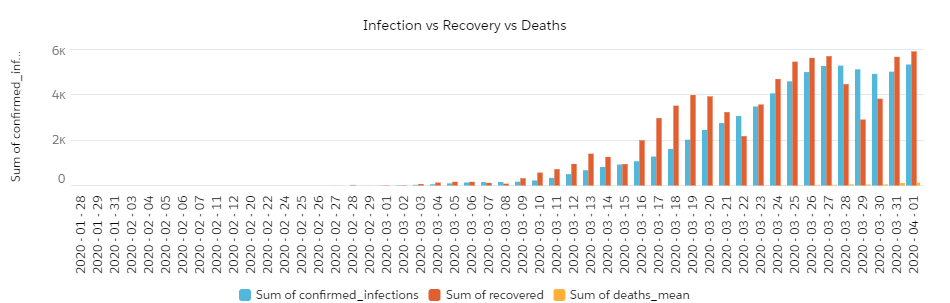

### We have data from Jan 28th, 2020 but if we observe closely, the sum of infections for Germany on 3rd March was just 54. So for the sake of simplicity, we are considering the analysis from March 3rd till June 3rd. 

In [89]:
Germany_df_mar3 = Germany_df[Germany_df['date']>= "2020-03-03"]

In [90]:
Germany_df_mar3.head()

,state,date,cases,deaths,recovered,allbed_mean,ICUbed_mean,InvVen_mean,deaths_mean,admis_mean,...,15_34_deaths,35_59_deaths,60_79_deaths,80_99_deaths,0_4_recovered,5_14_recovered,15_34_recovered,35_59_recovered,60_79_recovered,80_99_recovered
10,Baden-Wurttemberg,2020-03-03,23,0,23,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,3.0,4.0,12.0,4.0,NaN
11,Baden-Wurttemberg,2020-03-04,37,1,36,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,10.0,19.0,5.0,2.0
12,Baden-Wurttemberg,2020-03-05,36,0,36,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,1.0,NaN,12.0,20.0,3.0,NaN
13,Baden-Wurttemberg,2020-03-06,51,2,49,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,NaN,3.0,6.0,32.0,6.0,2.0
14,Baden-Wurttemberg,2020-03-07,31,1,30,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,NaN,NaN,2.0,3.0,18.0,7.0,NaN


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

# Creating a new date column "Time since day 1 of Infection" considering 3rd March as the first day of Infection

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

In [91]:
Germany_df_mar3['day 1 of infection'] = '2020-03-03'

In [92]:
Germany_df_mar3.head()

,state,date,cases,deaths,recovered,allbed_mean,ICUbed_mean,InvVen_mean,deaths_mean,admis_mean,...,35_59_deaths,60_79_deaths,80_99_deaths,0_4_recovered,5_14_recovered,15_34_recovered,35_59_recovered,60_79_recovered,80_99_recovered,day 1 of infection
10,Baden-Wurttemberg,2020-03-03,23,0,23,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,3.0,4.0,12.0,4.0,NaN,2020-03-03
11,Baden-Wurttemberg,2020-03-04,37,1,36,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,NaN,NaN,10.0,19.0,5.0,2.0,2020-03-03
12,Baden-Wurttemberg,2020-03-05,36,0,36,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,1.0,NaN,12.0,20.0,3.0,NaN,2020-03-03
13,Baden-Wurttemberg,2020-03-06,51,2,49,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,NaN,3.0,6.0,32.0,6.0,2.0,2020-03-03
14,Baden-Wurttemberg,2020-03-07,31,1,30,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,NaN,NaN,2.0,3.0,18.0,7.0,NaN,2020-03-03


In [93]:
Germany_df_mar3.head()

,state,date,cases,deaths,recovered,allbed_mean,ICUbed_mean,InvVen_mean,deaths_mean,admis_mean,...,35_59_deaths,60_79_deaths,80_99_deaths,0_4_recovered,5_14_recovered,15_34_recovered,35_59_recovered,60_79_recovered,80_99_recovered,day 1 of infection
10,Baden-Wurttemberg,2020-03-03,23,0,23,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,3.0,4.0,12.0,4.0,NaN,2020-03-03
11,Baden-Wurttemberg,2020-03-04,37,1,36,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,NaN,NaN,10.0,19.0,5.0,2.0,2020-03-03
12,Baden-Wurttemberg,2020-03-05,36,0,36,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,1.0,NaN,12.0,20.0,3.0,NaN,2020-03-03
13,Baden-Wurttemberg,2020-03-06,51,2,49,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,NaN,3.0,6.0,32.0,6.0,2.0,2020-03-03
14,Baden-Wurttemberg,2020-03-07,31,1,30,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,NaN,NaN,2.0,3.0,18.0,7.0,NaN,2020-03-03


In [94]:
Germany_df_mar3['date'] = pd.to_datetime(Germany_df_mar3['date'])
Germany_df_mar3['day 1 of infection'] = pd.to_datetime(Germany_df_mar3['day 1 of infection'])

In [95]:
Germany_df_mar3['Days since first day of infection']= (Germany_df_mar3['date']-Germany_df_mar3['day 1 of infection']).dt.days

In [96]:
Germany_df_mar3.tail()

,state,date,cases,deaths,recovered,allbed_mean,ICUbed_mean,InvVen_mean,deaths_mean,admis_mean,...,60_79_deaths,80_99_deaths,0_4_recovered,5_14_recovered,15_34_recovered,35_59_recovered,60_79_recovered,80_99_recovered,day 1 of infection,Days since first day of infection
1462,Thuringia,2020-05-30,11,0,0,72.67470,23.52390,21.23235,2.547,9.00725,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,2020-03-03,88
1463,Thuringia,2020-05-31,5,0,0,71.36285,23.06625,20.80445,2.527,8.50710,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,2020-03-03,89
1464,Thuringia,2020-06-01,2,0,0,69.74715,22.53255,20.31350,2.508,8.11120,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2020-03-03,90
1465,Thuringia,2020-06-02,4,0,0,67.87805,21.94560,19.75120,2.477,7.82145,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,2020-03-03,91
1466,Thuringia,2020-06-03,8,0,0,65.69245,21.31170,19.15350,2.430,7.45940,...,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,2020-03-03,92


In [97]:
Germany_df_mar3.isna().sum()[Germany_df_mar3.isna().sum() != 0]

confirmed_infections    152
Female_Cases             32
Male_Cases               51
Female_Deaths            32
Male_Deaths              51
Female_Recovered         32
Male_Recovered           51
0_4_cases               784
5_14_cases              580
15_34_cases             129
35_59_cases              68
60_79_cases             157
80_99_cases             349
0_4_deaths              784
5_14_deaths             580
15_34_deaths            129
35_59_deaths             68
60_79_deaths            157
80_99_deaths            349
0_4_recovered           784
5_14_recovered          580
15_34_recovered         129
35_59_recovered          68
60_79_recovered         157
80_99_recovered         349
dtype: int64

#### If we look closely to the attributes above we can see that the null values are from those attributes which were one hot encoded. Hence, it is safe to assume that they had zero values on those dates for those states. Hence replacing all the NaN values with zero.

In [98]:
Germany_df_mar3.columns

Index(['state', 'date', 'cases', 'deaths', 'recovered', 'allbed_mean',
       'ICUbed_mean', 'InvVen_mean', 'deaths_mean', 'admis_mean',
       'totdea_mean', 'total_tests', 'confirmed_infections', 'Female_Cases',
       'Male_Cases', 'Female_Deaths', 'Male_Deaths', 'Female_Recovered',
       'Male_Recovered', '0_4_cases', '5_14_cases', '15_34_cases',
       '35_59_cases', '60_79_cases', '80_99_cases', '0_4_deaths',
       '5_14_deaths', '15_34_deaths', '35_59_deaths', '60_79_deaths',
       '80_99_deaths', '0_4_recovered', '5_14_recovered', '15_34_recovered',
       '35_59_recovered', '60_79_recovered', '80_99_recovered',
       'day 1 of infection', 'Days since first day of infection'],
      dtype='object')

#### We can see there are a few attributes which give the same information like 'deaths' ,'totdea_mean' and 'deaths_mean'; then 'cases' and 'confirmed_infections'. So for our analysis we can keep 'deaths' and 'cases' and will drop the repetitive attributes 'totdea_mean', 'deaths_mean' and 'confirmed_infections'

In [99]:
Germany_df_mar3.drop(['deaths_mean','totdea_mean','confirmed_infections'], axis=1, inplace=True)

In [100]:
Germany_df_mar3.columns

Index(['state', 'date', 'cases', 'deaths', 'recovered', 'allbed_mean',
       'ICUbed_mean', 'InvVen_mean', 'admis_mean', 'total_tests',
       'Female_Cases', 'Male_Cases', 'Female_Deaths', 'Male_Deaths',
       'Female_Recovered', 'Male_Recovered', '0_4_cases', '5_14_cases',
       '15_34_cases', '35_59_cases', '60_79_cases', '80_99_cases',
       '0_4_deaths', '5_14_deaths', '15_34_deaths', '35_59_deaths',
       '60_79_deaths', '80_99_deaths', '0_4_recovered', '5_14_recovered',
       '15_34_recovered', '35_59_recovered', '60_79_recovered',
       '80_99_recovered', 'day 1 of infection',
       'Days since first day of infection'],
      dtype='object')

In [101]:
# Now replacing all the NaN values with 0

Germany_df_mar3 = Germany_df_mar3.fillna(0)

In [102]:
# Checking if all the NaN values are removed

Germany_df_mar3.isna().sum()[Germany_df_mar3.isna().sum() != 0]

Series([], dtype: int64)

#### Creating the population column for further use

In [103]:
Germany_df_mar3['state'].unique()

array(['Baden-Wurttemberg', 'Bavaria', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hesse', 'Lower Saxony', 'Mecklenburg-Vorpommern',
       'North Rhine-Westphalia', 'Rhineland-Palatinate', 'Saarland',
       'Saxony', 'Saxony-Anhalt', 'Schleswig-Holstein', 'Thuringia'],
      dtype=object)

In [104]:
Germany_df_mar3['population'] = 0

In [105]:
Germany_df_mar3.head()

,state,date,cases,deaths,recovered,allbed_mean,ICUbed_mean,InvVen_mean,admis_mean,total_tests,...,80_99_deaths,0_4_recovered,5_14_recovered,15_34_recovered,35_59_recovered,60_79_recovered,80_99_recovered,day 1 of infection,Days since first day of infection,population
10,Baden-Wurttemberg,2020-03-03,23,0,23,0.0,0.0,0.0,0.0,771.983437,...,0.0,0.0,3.0,4.0,12.0,4.0,0.0,2020-03-03,0,0
11,Baden-Wurttemberg,2020-03-04,37,1,36,0.0,0.0,0.0,0.0,854.409031,...,1.0,0.0,0.0,10.0,19.0,5.0,2.0,2020-03-03,1,0
12,Baden-Wurttemberg,2020-03-05,36,0,36,0.0,0.0,0.0,0.0,973.958448,...,0.0,1.0,0.0,12.0,20.0,3.0,0.0,2020-03-03,2,0
13,Baden-Wurttemberg,2020-03-06,51,2,49,0.0,0.0,0.0,0.0,1140.174185,...,2.0,0.0,3.0,6.0,32.0,6.0,2.0,2020-03-03,3,0
14,Baden-Wurttemberg,2020-03-07,31,1,30,0.0,0.0,0.0,0.0,1359.894741,...,0.0,0.0,2.0,3.0,18.0,7.0,0.0,2020-03-03,4,0


In [106]:
# Creating a population column for each state

def func(x):
    if x == 'Baden-Wurttemberg':
        return 11069533
    elif x== 'Bavaria':
        return 13076721
    elif x == 'Berlin':
        return 3644826
    elif x == 'Brandenburg':
        return 2511917
    elif x == 'Bremen':
        return 682986
    elif x == 'Hamburg':
        return 1841179
    elif x == 'Hesse':
        return 6265809
    elif x == 'Lower Saxony':
        return 7982448
    elif x == 'Mecklenburg-Vorpommern':
        return 1609675
    elif x == 'North Rhine-Westphalia':
        return 17932651
    elif x == 'Rhineland-Palatinate':
        return 4084844
    elif x == 'Saarland':
        return 990509
    elif x == 'Saxony':
        return 4077937
    elif x == 'Saxony-Anhalt':
        return 2208321
    elif x == 'Schleswig-Holstein':
        return 2896712
    elif x == 'Thuringia':
        return 2143145
    else:
        return 'N/A'
    
Germany_df_mar3['population'] = Germany_df_mar3['state'].apply(func)

####       ***The population figures above are sourced from wikipedia***


In [107]:
# Checking if any N/A values are there
Germany_df_mar3['population'].isna().sum()

0

#### Creating a cumulative sum of cases for each state by each date to calculate the number of Succeptibles

In [108]:
cum_sum_cases_df = Germany_df_mar3.groupby(['state','Days since first day of infection'])["cases"].sum().groupby(level=0).cumsum() 

In [109]:
cum_sum_cases_df=cum_sum_cases_df.to_frame()

In [110]:
cum_sum_cases_df.head()

cases
state             Days since first day of infection       
Baden-Wurttemberg 0                                     23
                  1                                     60
                  2                                     96
                  3                                    147
                  4                                    178

In [111]:
cum_sum_cases_df.rename(columns={'cases':'cum_cases'}, inplace = True)

In [112]:
#Merging the two datasets on state and Days since first day of infection
Germany_df_mar3_v1 = Germany_df_mar3.merge(cum_sum_cases_df, how = 'left',on = ['state','Days since first day of infection'])

In [113]:
Germany_df_mar3_v1.head()

,state,date,cases,deaths,recovered,allbed_mean,ICUbed_mean,InvVen_mean,admis_mean,total_tests,...,0_4_recovered,5_14_recovered,15_34_recovered,35_59_recovered,60_79_recovered,80_99_recovered,day 1 of infection,Days since first day of infection,population,cum_cases
0,Baden-Wurttemberg,2020-03-03,23,0,23,0.0,0.0,0.0,0.0,771.983437,...,0.0,3.0,4.0,12.0,4.0,0.0,2020-03-03,0,11069533,23
1,Baden-Wurttemberg,2020-03-04,37,1,36,0.0,0.0,0.0,0.0,854.409031,...,0.0,0.0,10.0,19.0,5.0,2.0,2020-03-03,1,11069533,60
2,Baden-Wurttemberg,2020-03-05,36,0,36,0.0,0.0,0.0,0.0,973.958448,...,1.0,0.0,12.0,20.0,3.0,0.0,2020-03-03,2,11069533,96
3,Baden-Wurttemberg,2020-03-06,51,2,49,0.0,0.0,0.0,0.0,1140.174185,...,0.0,3.0,6.0,32.0,6.0,2.0,2020-03-03,3,11069533,147
4,Baden-Wurttemberg,2020-03-07,31,1,30,0.0,0.0,0.0,0.0,1359.894741,...,0.0,2.0,3.0,18.0,7.0,0.0,2020-03-03,4,11069533,178


#### Creating the 'Succeptibles' attribute

In [114]:
Germany_df_mar3_v1['Succeptibles'] = Germany_df_mar3_v1['population']- Germany_df_mar3_v1['cum_cases']

In [115]:
Germany_df_mar3_v1.head()

,state,date,cases,deaths,recovered,allbed_mean,ICUbed_mean,InvVen_mean,admis_mean,total_tests,...,5_14_recovered,15_34_recovered,35_59_recovered,60_79_recovered,80_99_recovered,day 1 of infection,Days since first day of infection,population,cum_cases,Succeptibles
0,Baden-Wurttemberg,2020-03-03,23,0,23,0.0,0.0,0.0,0.0,771.983437,...,3.0,4.0,12.0,4.0,0.0,2020-03-03,0,11069533,23,11069510
1,Baden-Wurttemberg,2020-03-04,37,1,36,0.0,0.0,0.0,0.0,854.409031,...,0.0,10.0,19.0,5.0,2.0,2020-03-03,1,11069533,60,11069473
2,Baden-Wurttemberg,2020-03-05,36,0,36,0.0,0.0,0.0,0.0,973.958448,...,0.0,12.0,20.0,3.0,0.0,2020-03-03,2,11069533,96,11069437
3,Baden-Wurttemberg,2020-03-06,51,2,49,0.0,0.0,0.0,0.0,1140.174185,...,3.0,6.0,32.0,6.0,2.0,2020-03-03,3,11069533,147,11069386
4,Baden-Wurttemberg,2020-03-07,31,1,30,0.0,0.0,0.0,0.0,1359.894741,...,2.0,3.0,18.0,7.0,0.0,2020-03-03,4,11069533,178,11069355


#### Creating the 'Infection_rate' attribute

In [116]:
Germany_df_mar3_v1['Infection_rate'] = Germany_df_mar3_v1['cases'] /Germany_df_mar3_v1['total_tests']

In [117]:
Germany_df_mar3_v1.head()

,state,date,cases,deaths,recovered,allbed_mean,ICUbed_mean,InvVen_mean,admis_mean,total_tests,...,15_34_recovered,35_59_recovered,60_79_recovered,80_99_recovered,day 1 of infection,Days since first day of infection,population,cum_cases,Succeptibles,Infection_rate
0,Baden-Wurttemberg,2020-03-03,23,0,23,0.0,0.0,0.0,0.0,771.983437,...,4.0,12.0,4.0,0.0,2020-03-03,0,11069533,23,11069510,0.029793
1,Baden-Wurttemberg,2020-03-04,37,1,36,0.0,0.0,0.0,0.0,854.409031,...,10.0,19.0,5.0,2.0,2020-03-03,1,11069533,60,11069473,0.043305
2,Baden-Wurttemberg,2020-03-05,36,0,36,0.0,0.0,0.0,0.0,973.958448,...,12.0,20.0,3.0,0.0,2020-03-03,2,11069533,96,11069437,0.036963
3,Baden-Wurttemberg,2020-03-06,51,2,49,0.0,0.0,0.0,0.0,1140.174185,...,6.0,32.0,6.0,2.0,2020-03-03,3,11069533,147,11069386,0.044730
4,Baden-Wurttemberg,2020-03-07,31,1,30,0.0,0.0,0.0,0.0,1359.894741,...,3.0,18.0,7.0,0.0,2020-03-03,4,11069533,178,11069355,0.022796


#### Crating the 'Recovery_rate' attribute

In [118]:
Germany_df_mar3_v1['Recovery_rate'] = Germany_df_mar3_v1['recovered'] /Germany_df_mar3_v1['cases']

In [119]:
Germany_df_mar3_v1.head()

,state,date,cases,deaths,recovered,allbed_mean,ICUbed_mean,InvVen_mean,admis_mean,total_tests,...,35_59_recovered,60_79_recovered,80_99_recovered,day 1 of infection,Days since first day of infection,population,cum_cases,Succeptibles,Infection_rate,Recovery_rate
0,Baden-Wurttemberg,2020-03-03,23,0,23,0.0,0.0,0.0,0.0,771.983437,...,12.0,4.0,0.0,2020-03-03,0,11069533,23,11069510,0.029793,1.000000
1,Baden-Wurttemberg,2020-03-04,37,1,36,0.0,0.0,0.0,0.0,854.409031,...,19.0,5.0,2.0,2020-03-03,1,11069533,60,11069473,0.043305,0.972973
2,Baden-Wurttemberg,2020-03-05,36,0,36,0.0,0.0,0.0,0.0,973.958448,...,20.0,3.0,0.0,2020-03-03,2,11069533,96,11069437,0.036963,1.000000
3,Baden-Wurttemberg,2020-03-06,51,2,49,0.0,0.0,0.0,0.0,1140.174185,...,32.0,6.0,2.0,2020-03-03,3,11069533,147,11069386,0.044730,0.960784
4,Baden-Wurttemberg,2020-03-07,31,1,30,0.0,0.0,0.0,0.0,1359.894741,...,18.0,7.0,0.0,2020-03-03,4,11069533,178,11069355,0.022796,0.967742


#### Creating the 'Mortality_rate' attribute

In [120]:
Germany_df_mar3_v1['Mortality_rate'] = Germany_df_mar3_v1['deaths'] /Germany_df_mar3_v1['cases']

In [121]:
Germany_df_mar3_v1.head()

,state,date,cases,deaths,recovered,allbed_mean,ICUbed_mean,InvVen_mean,admis_mean,total_tests,...,60_79_recovered,80_99_recovered,day 1 of infection,Days since first day of infection,population,cum_cases,Succeptibles,Infection_rate,Recovery_rate,Mortality_rate
0,Baden-Wurttemberg,2020-03-03,23,0,23,0.0,0.0,0.0,0.0,771.983437,...,4.0,0.0,2020-03-03,0,11069533,23,11069510,0.029793,1.000000,0.000000
1,Baden-Wurttemberg,2020-03-04,37,1,36,0.0,0.0,0.0,0.0,854.409031,...,5.0,2.0,2020-03-03,1,11069533,60,11069473,0.043305,0.972973,0.027027
2,Baden-Wurttemberg,2020-03-05,36,0,36,0.0,0.0,0.0,0.0,973.958448,...,3.0,0.0,2020-03-03,2,11069533,96,11069437,0.036963,1.000000,0.000000
3,Baden-Wurttemberg,2020-03-06,51,2,49,0.0,0.0,0.0,0.0,1140.174185,...,6.0,2.0,2020-03-03,3,11069533,147,11069386,0.044730,0.960784,0.039216
4,Baden-Wurttemberg,2020-03-07,31,1,30,0.0,0.0,0.0,0.0,1359.894741,...,7.0,0.0,2020-03-03,4,11069533,178,11069355,0.022796,0.967742,0.032258


#### Creating the 'beds_to_InfCase_ratio' which shows how many hospital beds were available per infected case

In [122]:
Germany_df_mar3_v1['beds_to_InfCase_ratio'] = Germany_df_mar3_v1['allbed_mean'] /Germany_df_mar3_v1['cases']

In [123]:
Germany_df_mar3_v1.head()

,state,date,cases,deaths,recovered,allbed_mean,ICUbed_mean,InvVen_mean,admis_mean,total_tests,...,80_99_recovered,day 1 of infection,Days since first day of infection,population,cum_cases,Succeptibles,Infection_rate,Recovery_rate,Mortality_rate,beds_to_InfCase_ratio
0,Baden-Wurttemberg,2020-03-03,23,0,23,0.0,0.0,0.0,0.0,771.983437,...,0.0,2020-03-03,0,11069533,23,11069510,0.029793,1.000000,0.000000,0.0
1,Baden-Wurttemberg,2020-03-04,37,1,36,0.0,0.0,0.0,0.0,854.409031,...,2.0,2020-03-03,1,11069533,60,11069473,0.043305,0.972973,0.027027,0.0
2,Baden-Wurttemberg,2020-03-05,36,0,36,0.0,0.0,0.0,0.0,973.958448,...,0.0,2020-03-03,2,11069533,96,11069437,0.036963,1.000000,0.000000,0.0
3,Baden-Wurttemberg,2020-03-06,51,2,49,0.0,0.0,0.0,0.0,1140.174185,...,2.0,2020-03-03,3,11069533,147,11069386,0.044730,0.960784,0.039216,0.0
4,Baden-Wurttemberg,2020-03-07,31,1,30,0.0,0.0,0.0,0.0,1359.894741,...,0.0,2020-03-03,4,11069533,178,11069355,0.022796,0.967742,0.032258,0.0


#### Creating the 'Critical_care_1' attribute by dividing number of ICU beds by the number of hospital admissions. This feature tells us about the availability of ICU beds for each admission in a hospital

In [124]:
Germany_df_mar3_v1['Critical_care_1'] = Germany_df_mar3_v1['ICUbed_mean'] /Germany_df_mar3_v1['admis_mean']

In [125]:
Germany_df_mar3_v1.head()

,state,date,cases,deaths,recovered,allbed_mean,ICUbed_mean,InvVen_mean,admis_mean,total_tests,...,day 1 of infection,Days since first day of infection,population,cum_cases,Succeptibles,Infection_rate,Recovery_rate,Mortality_rate,beds_to_InfCase_ratio,Critical_care_1
0,Baden-Wurttemberg,2020-03-03,23,0,23,0.0,0.0,0.0,0.0,771.983437,...,2020-03-03,0,11069533,23,11069510,0.029793,1.000000,0.000000,0.0,NaN
1,Baden-Wurttemberg,2020-03-04,37,1,36,0.0,0.0,0.0,0.0,854.409031,...,2020-03-03,1,11069533,60,11069473,0.043305,0.972973,0.027027,0.0,NaN
2,Baden-Wurttemberg,2020-03-05,36,0,36,0.0,0.0,0.0,0.0,973.958448,...,2020-03-03,2,11069533,96,11069437,0.036963,1.000000,0.000000,0.0,NaN
3,Baden-Wurttemberg,2020-03-06,51,2,49,0.0,0.0,0.0,0.0,1140.174185,...,2020-03-03,3,11069533,147,11069386,0.044730,0.960784,0.039216,0.0,NaN
4,Baden-Wurttemberg,2020-03-07,31,1,30,0.0,0.0,0.0,0.0,1359.894741,...,2020-03-03,4,11069533,178,11069355,0.022796,0.967742,0.032258,0.0,NaN


#### Creating the 'Critical_care_2' attribute by dividing number of InvVen  by the number of hospital admissions. This feature tells us about the availability of ventilators for each admission in a hospital

In [126]:
Germany_df_mar3_v1['Critical_care_2'] = Germany_df_mar3_v1['InvVen_mean'] /Germany_df_mar3_v1['admis_mean']

In [127]:
Germany_df_mar3_v1.head()

,state,date,cases,deaths,recovered,allbed_mean,ICUbed_mean,InvVen_mean,admis_mean,total_tests,...,Days since first day of infection,population,cum_cases,Succeptibles,Infection_rate,Recovery_rate,Mortality_rate,beds_to_InfCase_ratio,Critical_care_1,Critical_care_2
0,Baden-Wurttemberg,2020-03-03,23,0,23,0.0,0.0,0.0,0.0,771.983437,...,0,11069533,23,11069510,0.029793,1.000000,0.000000,0.0,NaN,NaN
1,Baden-Wurttemberg,2020-03-04,37,1,36,0.0,0.0,0.0,0.0,854.409031,...,1,11069533,60,11069473,0.043305,0.972973,0.027027,0.0,NaN,NaN
2,Baden-Wurttemberg,2020-03-05,36,0,36,0.0,0.0,0.0,0.0,973.958448,...,2,11069533,96,11069437,0.036963,1.000000,0.000000,0.0,NaN,NaN
3,Baden-Wurttemberg,2020-03-06,51,2,49,0.0,0.0,0.0,0.0,1140.174185,...,3,11069533,147,11069386,0.044730,0.960784,0.039216,0.0,NaN,NaN
4,Baden-Wurttemberg,2020-03-07,31,1,30,0.0,0.0,0.0,0.0,1359.894741,...,4,11069533,178,11069355,0.022796,0.967742,0.032258,0.0,NaN,NaN


In [128]:
# Checking for NaN values

Germany_df_mar3_v1.isna().sum()[Germany_df_mar3_v1.isna().sum() != 0]

Critical_care_1    216
Critical_care_2    216
dtype: int64

#### Since all the NaN values are in the calculated attributes, they are basically numerical division of zero with zero. Hence replacing all the NaN values with zero(0)

In [129]:
Germany_df_mar3_v1 = Germany_df_mar3_v1.fillna(0)

In [130]:
# Checking for NaN values

Germany_df_mar3_v1.isna().sum()[Germany_df_mar3_v1.isna().sum() != 0]

Series([], dtype: int64)

#### Label Encoding the 'state' attribute

In [131]:
le = preprocessing.LabelEncoder() 
Germany_df_mar3_v1['state'] = le.fit_transform(Germany_df_mar3_v1['state'])

In [132]:
Germany_df_mar3_v1['state'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [133]:
Germany_df_mar3_v1.tail()

,state,date,cases,deaths,recovered,allbed_mean,ICUbed_mean,InvVen_mean,admis_mean,total_tests,...,Days since first day of infection,population,cum_cases,Succeptibles,Infection_rate,Recovery_rate,Mortality_rate,beds_to_InfCase_ratio,Critical_care_1,Critical_care_2
1408,15,2020-05-30,11,0,0,72.67470,23.52390,21.23235,9.00725,3225.646484,...,88,2143145,3014,2140131,0.003410,0.0,0.0,6.606791,2.611663,2.357251
1409,15,2020-05-31,5,0,0,71.36285,23.06625,20.80445,8.50710,3251.572304,...,89,2143145,3019,2140126,0.001538,0.0,0.0,14.272570,2.711412,2.445540
1410,15,2020-06-01,2,0,0,69.74715,22.53255,20.31350,8.11120,3277.498123,...,90,2143145,3021,2140124,0.000610,0.0,0.0,34.873575,2.777955,2.504377
1411,15,2020-06-02,4,0,0,67.87805,21.94560,19.75120,7.82145,3303.423942,...,91,2143145,3025,2140120,0.001211,0.0,0.0,16.969513,2.805822,2.525261
1412,15,2020-06-03,8,0,0,65.69245,21.31170,19.15350,7.45940,3329.349762,...,92,2143145,3033,2140112,0.002403,0.0,0.0,8.211556,2.857026,2.567700


###### Upon analysing the different dates on which different restrictions were imposed, we can see that the lockdowns started happening around 17th March 2020 and all types of restrictions were imposed by 27th March 2020. Since there is a lag in terms reflecting the effects of lockdown in the numbers across different states, we are considering 2 different dates; "31st March, 2020" and "10th April, 2020" as the threshold for imposed lockdown, i.e. the Germany_df_mar3_v1 dataframe will be divided into 2 dataframes "Pre_lockdown_Ger_df1" and "Post_lockdown_Ger_df1" where the threshold is 31st March, 2020. Similarly "Pre_lockdown_Ger_df2" and "Post_lockdown_Ger_df2" will be created based on the threshold of 10th April, 2020

In [134]:
Pre_lockdown_Ger_df1 = Germany_df_mar3_v1.loc[Germany_df_mar3_v1["date"] < "2020-04-08"]
Post_lockdown_Ger_df1 = Germany_df_mar3_v1.loc[Germany_df_mar3_v1["date"] > "2020-04-07"]

In [135]:
Pre_lockdown_Ger_df2 = Germany_df_mar3_v1.loc[Germany_df_mar3_v1["date"] < "2020-04-11"]
Post_lockdown_Ger_df2 = Germany_df_mar3_v1.loc[Germany_df_mar3_v1["date"] > "2020-04-10"]

In [136]:
# Checking the subsets
Pre_lockdown_Ger_df1.head()

,state,date,cases,deaths,recovered,allbed_mean,ICUbed_mean,InvVen_mean,admis_mean,total_tests,...,Days since first day of infection,population,cum_cases,Succeptibles,Infection_rate,Recovery_rate,Mortality_rate,beds_to_InfCase_ratio,Critical_care_1,Critical_care_2
0,0,2020-03-03,23,0,23,0.0,0.0,0.0,0.0,771.983437,...,0,11069533,23,11069510,0.029793,1.000000,0.000000,0.0,0.0,0.0
1,0,2020-03-04,37,1,36,0.0,0.0,0.0,0.0,854.409031,...,1,11069533,60,11069473,0.043305,0.972973,0.027027,0.0,0.0,0.0
2,0,2020-03-05,36,0,36,0.0,0.0,0.0,0.0,973.958448,...,2,11069533,96,11069437,0.036963,1.000000,0.000000,0.0,0.0,0.0
3,0,2020-03-06,51,2,49,0.0,0.0,0.0,0.0,1140.174185,...,3,11069533,147,11069386,0.044730,0.960784,0.039216,0.0,0.0,0.0
4,0,2020-03-07,31,1,30,0.0,0.0,0.0,0.0,1359.894741,...,4,11069533,178,11069355,0.022796,0.967742,0.032258,0.0,0.0,0.0


In [137]:
# Dropping the 'date' and 'day 1 of infection' attributes from all the four newly created dataframes

Pre_lockdown_Ger_df1.drop(['date','day 1 of infection'], axis=1,inplace=True)
Post_lockdown_Ger_df1.drop(['date','day 1 of infection'], axis=1,inplace=True)
Pre_lockdown_Ger_df2.drop(['date','day 1 of infection'], axis=1,inplace=True)
Post_lockdown_Ger_df2.drop(['date','day 1 of infection'], axis=1,inplace=True)

# Conducting the Hypothesis Test

#### Checking Infection rate by each day, for the entire Germany dataset

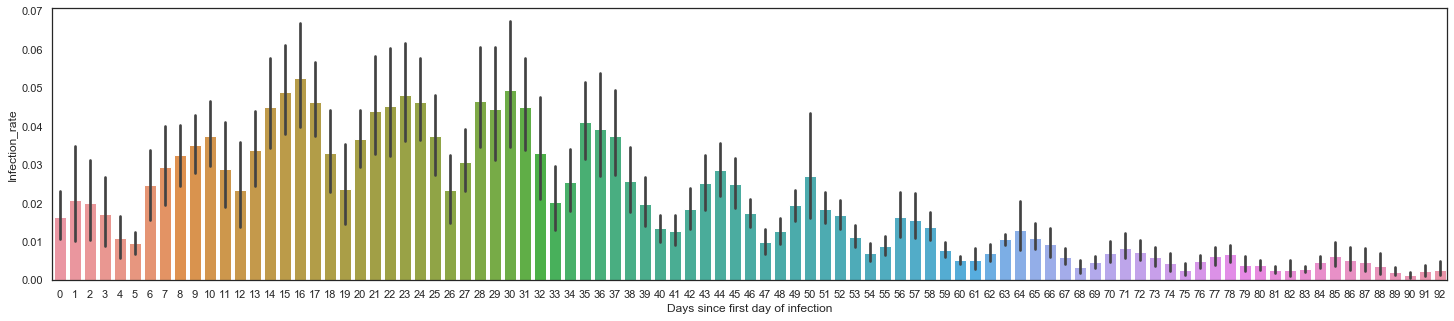

In [138]:
sns.set(rc={'figure.figsize':(25,5)})
sns.set_style("white")
sns.barplot(Germany_df_mar3_v1['Days since first day of infection'], Germany_df_mar3_v1['Infection_rate'])

count    1413.000000
mean        0.020276
std         0.021591
min         0.000174
25%         0.004910
50%         0.012585
75%         0.028646
max         0.133924
Name: Infection_rate, dtype: float64


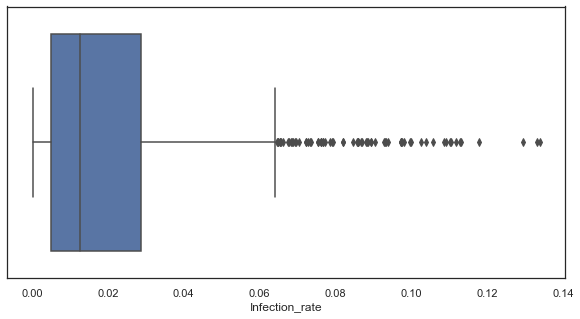

In [139]:
# checking 5 point summary and presence of outliers
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("white")
sns.boxplot(Germany_df_mar3_v1['Infection_rate'])
print(Germany_df_mar3_v1['Infection_rate'].describe())


1.922994182514185


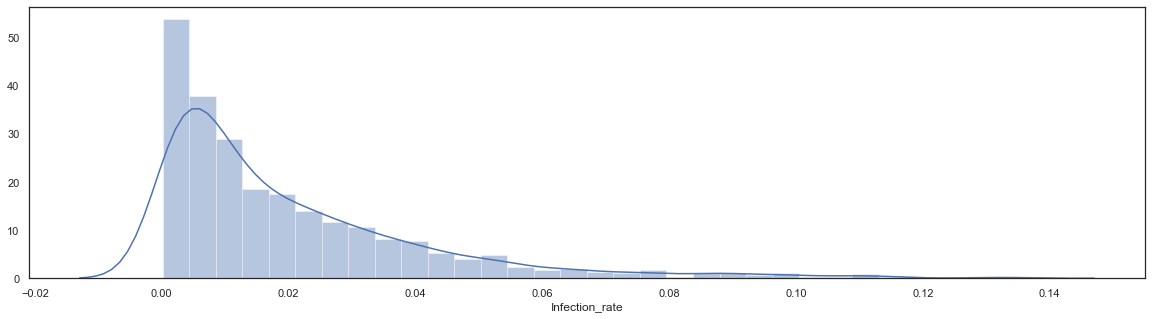

In [140]:
# Checking the distribution of IR
fig=plt.figure(figsize=(20,5))
sns.set_style("white")
sns.distplot(Germany_df_mar3_v1['Infection_rate'], label='Pre Lockdown 31-Mar')
print(Germany_df_mar3_v1['Infection_rate'].skew())

#### The overall Infection rate is a right skewd distribution.

In [141]:
Post_lockdown_Ger_df1['cases'].sum()

73875

#### Checking the distriution of Infection rate across Pre-Lockdown df and Post-Lockdown df

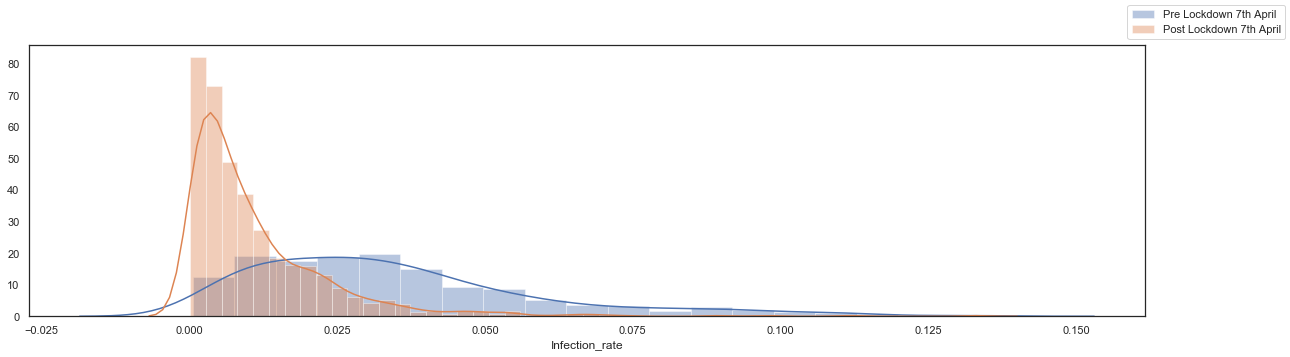

In [142]:
fig=plt.figure(figsize=(20,5))
sns.distplot(Pre_lockdown_Ger_df1['Infection_rate'], label='Pre Lockdown 7th April')
sns.distplot(Post_lockdown_Ger_df1['Infection_rate'], label='Post Lockdown 7th April')
fig.legend()

In [143]:
# Checking Skewness and 5 point summary for Pre-Lockdown IR
print(Pre_lockdown_Ger_df1['Infection_rate'].skew())
Pre_lockdown_Ger_df1['Infection_rate'].describe()


1.2195269399869282


count    541.000000
mean       0.034650
std        0.024646
min        0.000610
25%        0.016639
50%        0.029793
75%        0.045238
max        0.133924
Name: Infection_rate, dtype: float64

In [144]:
# Checking Skewness and 5 point summary for Post-Lockdown IR
print(Post_lockdown_Ger_df1['Infection_rate'].skew())
Post_lockdown_Ger_df1['Infection_rate'].describe()


3.249229085293953


count    872.000000
mean       0.011358
std        0.013083
min        0.000174
25%        0.003280
50%        0.007211
75%        0.014733
max        0.133052
Name: Infection_rate, dtype: float64

#### Looks like both the distrbutions are right skewed as mean is greater than median. Pre-Lockdown IR distribution appears to be less right skewed as compared to Post-Lockdown IR. Let's try to normalize the 2 samples by applying cube root transformation

In [145]:
Pre_LD_Gerdf1_IRtrans = Pre_lockdown_Ger_df1['Infection_rate']**(1/4)
Post_LD_Gerdf1_IRtrans = Post_lockdown_Ger_df1['Infection_rate']**(1/4)
print(Pre_LD_Gerdf1_IRtrans.skew())
print(Post_LD_Gerdf1_IRtrans.skew())

-0.3073694683410008
0.27580164945493585


In [146]:
# Transforming Pre-Lockdown IR (Till 7th April)
Pre_LD_Gerdf1_IRtrans = Pre_lockdown_Ger_df1['Infection_rate']**(1/3)
Pre_LD_Gerdf1_IRtrans.describe()

count    541.000000
mean       0.306832
std        0.079539
min        0.084792
25%        0.255293
50%        0.310008
75%        0.356316
max        0.511627
Name: Infection_rate, dtype: float64

-0.099195984985518


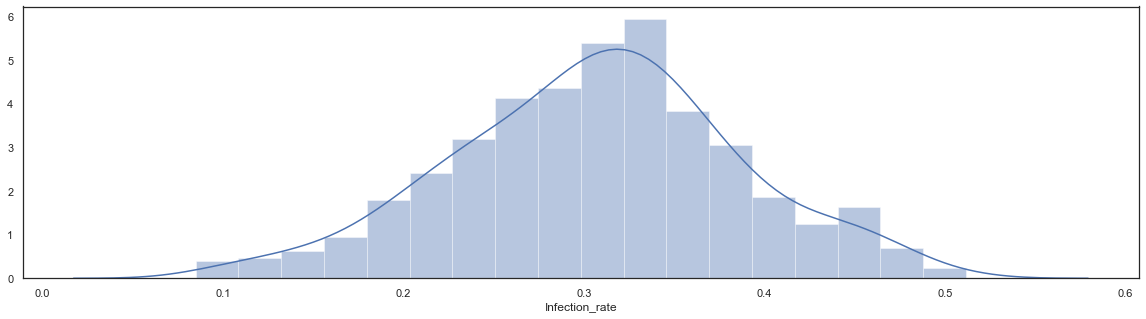

In [147]:
# Checking Skewness and distrbution of tansformed pre-lockdown IR (till 7th April)
print(Pre_LD_Gerdf1_IRtrans.skew())
fig=plt.figure(figsize=(20,5))
sns.distplot(Pre_LD_Gerdf1_IRtrans, label='Pre Lockdown 31-Mar')

In [148]:
# Transforming Post-Lockdown IR (post 7th April)
Post_LD_Gerdf1_IRtrans = Post_lockdown_Ger_df1['Infection_rate']**(1/3)
Post_LD_Gerdf1_IRtrans.describe()

count    872.000000
mean       0.199451
std        0.073345
min        0.055877
25%        0.148577
50%        0.193200
75%        0.245148
max        0.510514
Name: Infection_rate, dtype: float64

0.5311530266245577


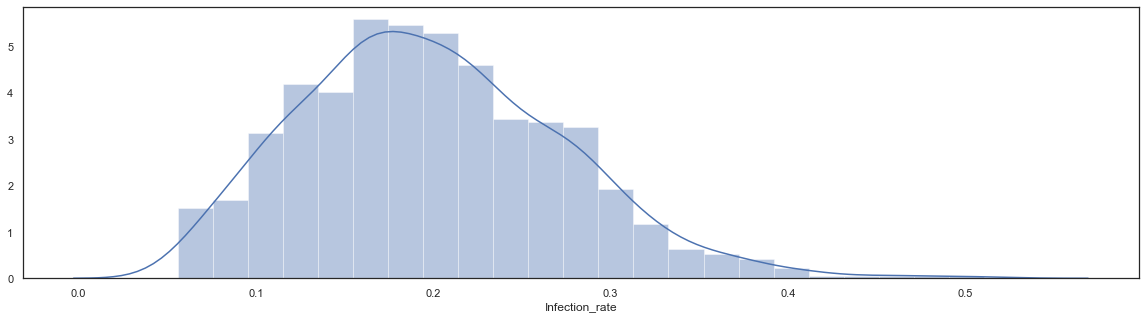

In [149]:
# Checking Skewness and distrbution of tansformed post-lockdown IR (post 7th April)
print(Post_LD_Gerdf1_IRtrans.skew())
fig=plt.figure(figsize=(20,5))
sns.distplot(Post_LD_Gerdf1_IRtrans, label='Post Lockdown 7th April')

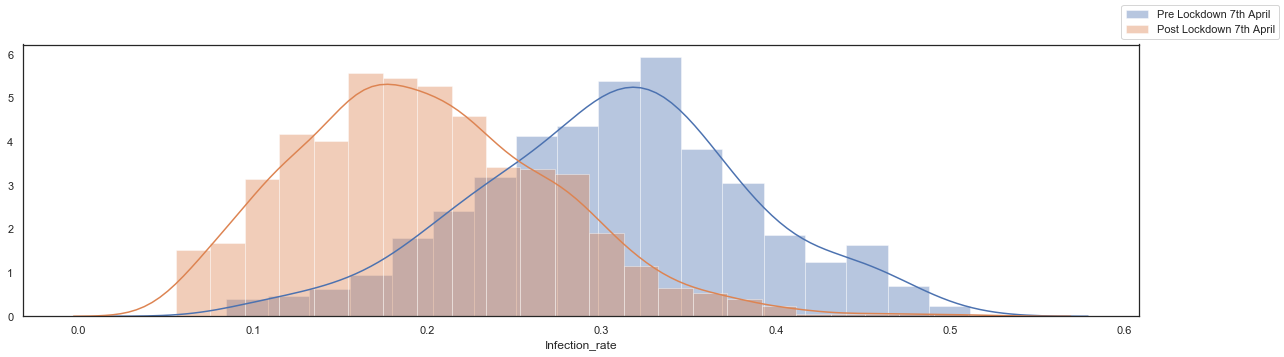

In [150]:
# Plotting the distribution of the transformed IRs 

fig=plt.figure(figsize=(20,5))
sns.distplot(Pre_LD_Gerdf1_IRtrans, label='Pre Lockdown 7th April')
sns.distplot(Post_LD_Gerdf1_IRtrans, label='Post Lockdown 7th April')
fig.legend()

# Q.) Does Infection rate differ significantly between prelockdown period and post lockdown period?

# Null Hypothesis (H0): Infection rate in Prelockdown (before 31st March) = Infection rate in Postlockdown (after 31st March)

# Running a 2 sample ttest on infection rate between Pre-Lockdown and Post-Lockdown time periods.

##### Pre-Lockdown : Any date till 7th April, 2020
##### Post-Lockdown : Any date after 7th April, 2020

In [151]:
from scipy.stats import ttest_ind

In [152]:
significance = 0.01

In [153]:
t_stat,p_value=ttest_ind(Pre_LD_Gerdf1_IRtrans,Post_LD_Gerdf1_IRtrans)
print('t_stat for 2-sample test on Pre-Lockdown Infection Rate and Post-Lockdown Infection Rate is : %.2f' % t_stat)
print('p_value for 2-sample test on Pre-Lockdown Infection Rate and Post-Lockdown Infection Rate is : ', p_value)
if (p_value< significance): print('Null Hypothesis is rejected at 0.01 level of significance')
else: print('Fail to reject the Null Hypothesis at 0.01 level of significance')

t_stat for 2-sample test on Pre-Lockdown Infection Rate and Post-Lockdown Infection Rate is : 25.89
p_value for 2-sample test on Pre-Lockdown Infection Rate and Post-Lockdown Infection Rate is :  2.858777717094795e-121
Null Hypothesis is rejected at 0.01 level of significance


# Running ANOVA on infection rate between Pre-Lockdown and Post-Lockdown time periods.
#### Pre-Lockdown : Any date till 7th April, 2020
#### Post-Lockdown : Any date after 7th April, 2020

In [154]:
stat,p_value = stats.f_oneway(Pre_LD_Gerdf1_IRtrans,Post_LD_Gerdf1_IRtrans)
significance = 0.01
print('stat for Anova on Pre-Lockdown Infection Rate and Post-Lockdown Infection Rate is : %.2f' % stat)
print('p_value for Anova on Pre-Lockdown Infection Rate and Post-Lockdown Infection Rate is : ',p_value)
if (p_value< significance): print('Null Hypothesis is rejected at 0.01 level of significance')
else: print('Fail to reject the Null Hypothesis at 0.01 level of significance')

stat for Anova on Pre-Lockdown Infection Rate and Post-Lockdown Infection Rate is : 670.45
p_value for Anova on Pre-Lockdown Infection Rate and Post-Lockdown Infection Rate is :  2.858777717096619e-121
Null Hypothesis is rejected at 0.01 level of significance
